In [3]:
import sklearn.linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [10]:
df = pd.read_csv('Gold_prices.csv')
df = df[df.columns[~df.columns.str.contains('Unnamed:')]]
df.columns = ['Date', 'Price']
df.head()


,Date,Price
0,03-01-1997,"13,064.0"
1,06-01-1997,"12,863.0"
2,07-01-1997,"12,886.3"
3,08-01-1997,"12,793.0"
4,09-01-1997,"12,788.9"


In [11]:
x = [i for i in range(0,len(df['Price']))] 

In [12]:
print(df['Price'])


0       13,064.0
1       12,863.0
2       12,886.3
3       12,793.0
4       12,788.9
5       12,843.3
6       12,895.2
7       12,812.2
8       12,706.5
9       12,659.5
10      12,752.6
11      12,658.6
12      12,718.1
13      12,592.6
14      12,468.8
15      12,635.4
16      12,674.8
17      12,684.6
18      12,590.4
19      12,531.1
20      12,394.8
21      12,350.0
22      12,391.6
23      12,319.5
24      12,296.2
25      12,181.7
26      12,208.4
27      12,172.6
28      12,111.6
29      12,313.8
          ...   
5466    80,924.2
5467    80,755.3
5468    81,041.8
5469    81,027.6
5470    81,022.9
5471    81,022.9
5472    81,070.3
5473    82,087.9
5474    82,761.2
5475    82,401.3
5476    82,401.3
5477    83,245.3
5478    83,548.7
5479    83,334.4
5480    83,462.8
5481    83,674.9
5482    83,495.9
5483    83,944.3
5484    84,228.6
5485    84,417.6
5486    84,983.8
5487    85,426.4
5488    85,296.3
5489    85,046.0
5490    85,149.8
5491    85,084.8
5492    85,064.2
5493    86,195

In [13]:
new_price = []
for i in df['Price']:
    i = i[:2]+i[3:8]
    i = float(i)
    new_price.append(i)    
type(new_price[0])

float

In [14]:
#price = df['Price'].tolist()

In [15]:
df['Price'] = new_price

In [16]:
(df['Date'][17])

'28-01-1997'

In [17]:

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [26]:
df['Date'][2]

Timestamp('1997-01-07 00:00:00')

<IPython.core.display.Javascript object>


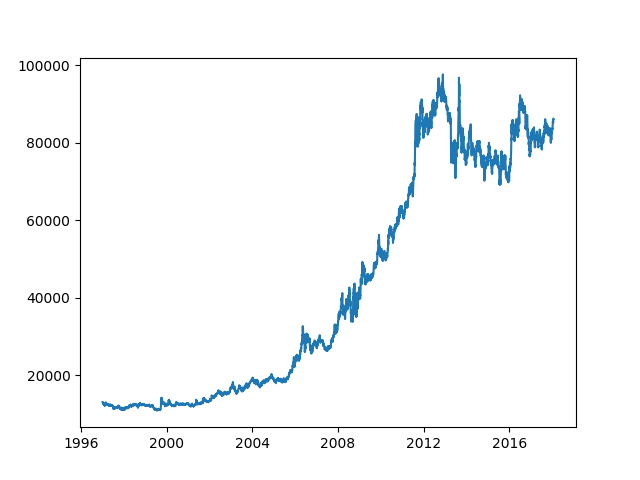

In [18]:
fig = plt.figure(1)
axes = fig.add_subplot(111)
axes.plot(df['Date'], df['Price'])
plt.show()

In [88]:
uniq_date = []


In [80]:
for i in range(0,21):
    if (str(df['Date'][i]).startswith(str(1997+i)+"-01-")):
        uniq_date.append( df['Price'][i])
        break
uniq_date

[0       13064.0
 1       12863.0
 2       12886.3
 3       12793.0
 4       12788.9
 5       12843.3
 6       12895.2
 7       12812.2
 8       12706.5
 9       12659.5
 10      12752.6
 11      12658.6
 12      12718.1
 13      12592.6
 14      12468.8
 15      12635.4
 16      12674.8
 17      12684.6
 18      12590.4
 19      12531.1
 20      12394.8
 21      12350.0
 22      12391.6
 23      12319.5
 24      12296.2
 25      12181.7
 26      12208.4
 27      12172.6
 28      12111.6
 29      12313.8
          ...   
 5466    80924.2
 5467    80755.3
 5468    81041.8
 5469    81027.6
 5470    81022.9
 5471    81022.9
 5472    81070.3
 5473    82087.9
 5474    82761.2
 5475    82401.3
 5476    82401.3
 5477    83245.3
 5478    83548.7
 5479    83334.4
 5480    83462.8
 5481    83674.9
 5482    83495.9
 5483    83944.3
 5484    84228.6
 5485    84417.6
 5486    84983.8
 5487    85426.4
 5488    85296.3
 5489    85046.0
 5490    85149.8
 5491    85084.8
 5492    85064.2
 5493    86195

In [102]:
uniq_date =[]
a=1997

while(a<2018):
    for i in range(len(df['Date'])):
        if str(df['Date'][i]).startswith(str(a)+"-08"):
            uniq_date.append(df['Price'][i])
            break
    a += 1
uniq_date

21

In [107]:
uniq_date

[11596.299999999999,
 12171.4,
 11063.700000000001,
 12530.9,
 12594.799999999999,
 14698.4,
 16264.5,
 18128.400000000001,
 18729.299999999999,
 29684.700000000001,
 26932.900000000001,
 38648.900000000001,
 45717.699999999997,
 54962.199999999997,
 71541.800000000003,
 88720.5,
 79248.5,
 78856.600000000006,
 69921.199999999997,
 90109.399999999994,
 81431.300000000003]

In [106]:
slope = []
for i in range(len(uniq_date)-1):
    slope.append(uniq_date[i+1]-uniq_date[i])
slope


[575.10000000000036,
 -1107.6999999999989,
 1467.1999999999989,
 63.899999999999636,
 2103.6000000000004,
 1566.1000000000004,
 1863.9000000000015,
 600.89999999999782,
 10955.400000000001,
 -2751.7999999999993,
 11716.0,
 7068.7999999999956,
 9244.5,
 16579.600000000006,
 17178.699999999997,
 -9472.0,
 -391.89999999999418,
 -8935.4000000000087,
 20188.199999999997,
 -8678.0999999999913]